In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../../Dataset/Palladium.csv')
df.shape

(1687, 5)

In [3]:
# Kiểm tra cột close có hàng nào null không
df['Close'].isnull().sum()

0

In [4]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

# Sắp xếp lại index
df = df.sort_index(ascending=True)
df = df.drop(columns=['Open', 'High', 'Low'])
df

,Close
Date,
2019-03-01,1551.5
2019-03-03,1549.5
2019-03-04,1535.5
2019-03-05,1514.5
2019-03-06,1535.0
...,...
2024-03-22,992.5
2024-03-23,992.5
2024-03-24,984.0


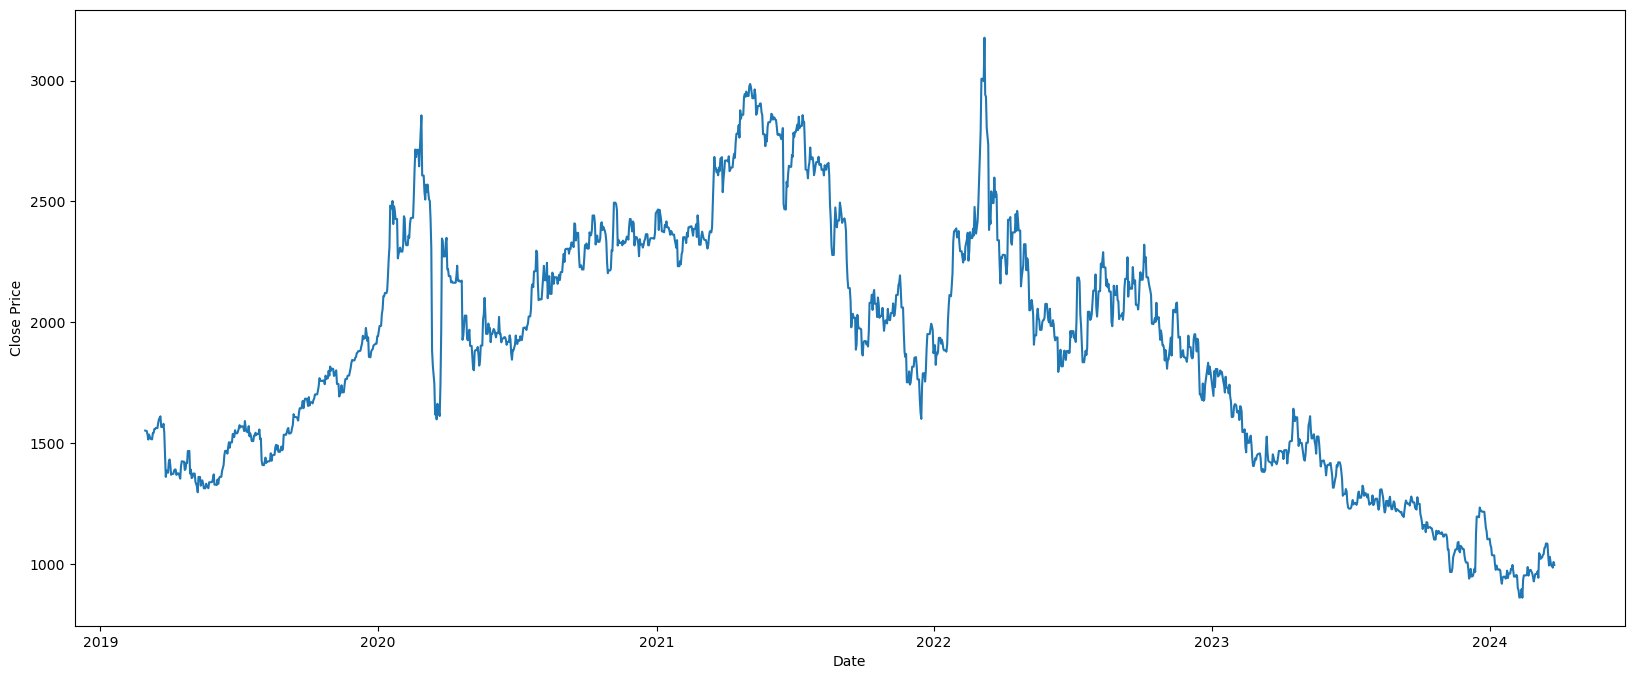

In [5]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [6]:
# Chia train test theo tỉ lệ
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [7]:
# Chia các tập x,y train, test tương ứng
x_train = np.array(train_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(train_data['Close']) #Lấy dữ liệu giá Close

x_test = np.array(test_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(test_data['Close']) #Lấy dữ liệu giá Close

In [8]:
# Quá trình training
# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14386.468, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14390.292, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14386.946, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14387.361, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14388.293, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14384.992, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14386.847, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14387.518, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14384.502, Time=0.98 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14388.265, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14385.576, Time=1.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=14388.963, Time=1.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=14386.964, Time=0.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14384.811, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# Tóm tắt model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1349
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -7186.252
Date:                Thu, 30 May 2024   AIC                          14382.505
Time:                        16:32:01   BIC                          14408.537
Sample:                             0   HQIC                         14392.254
                               - 1349                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9053      0.048     18.694      0.000       0.810       1.000
ma.L1         -0.8485      0.052    -16.289      0.000      -0.951      -0.746
ma.L2         -0.0201      0.035     -0.575      0.565      -0.089       0.048
ma.L3         -0.0598      0.025     -2.425      0.015      -0.108      -0.011
sigma2      2500.3240     47.818     52.288      0.000    2406.602    2594.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6073.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Quá trình testing 
y_pred = model.predict(n_periods=len(x_test))

In [11]:
# Tính MSE - Mean Squared Error - Sai số bình phương trung bình
test_mse = mean_squared_error(y_test, y_pred) 
print('Testing MSE:', test_mse)

# Tính RMSE - Root Mean Squared Error - Sai số bình phương trung bình
test_rmse = math.sqrt(test_mse)
print('Testing RMSE:', test_rmse)

# Tính MAPE - Mean Absolute Percentage Error - Tỷ lệ phần trăm sai số tuyệt đối trung bình
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing MSE: 110702.71215866899
Testing RMSE: 332.72017095251226
Testing MAPE: 0.27004254060336197


Giá Close dự đoán:
[1471.6699613  1473.59094231 1473.01064605 1472.48527598 1472.00963322
 1471.57901099 1471.189148   1470.83618632 1470.51663316 1470.22732634
 1469.96540298 1469.72827118 1469.51358438 1469.31921811 1469.14324899
 1468.9839357  1468.83970172 1468.70911977 1468.59089767 1468.48386552
 1468.38696417 1468.29923473 1468.21980906 1468.14790118 1468.08279952
 1468.02385987 1467.97049897 1467.92218878 1467.87845125 1467.83885357]


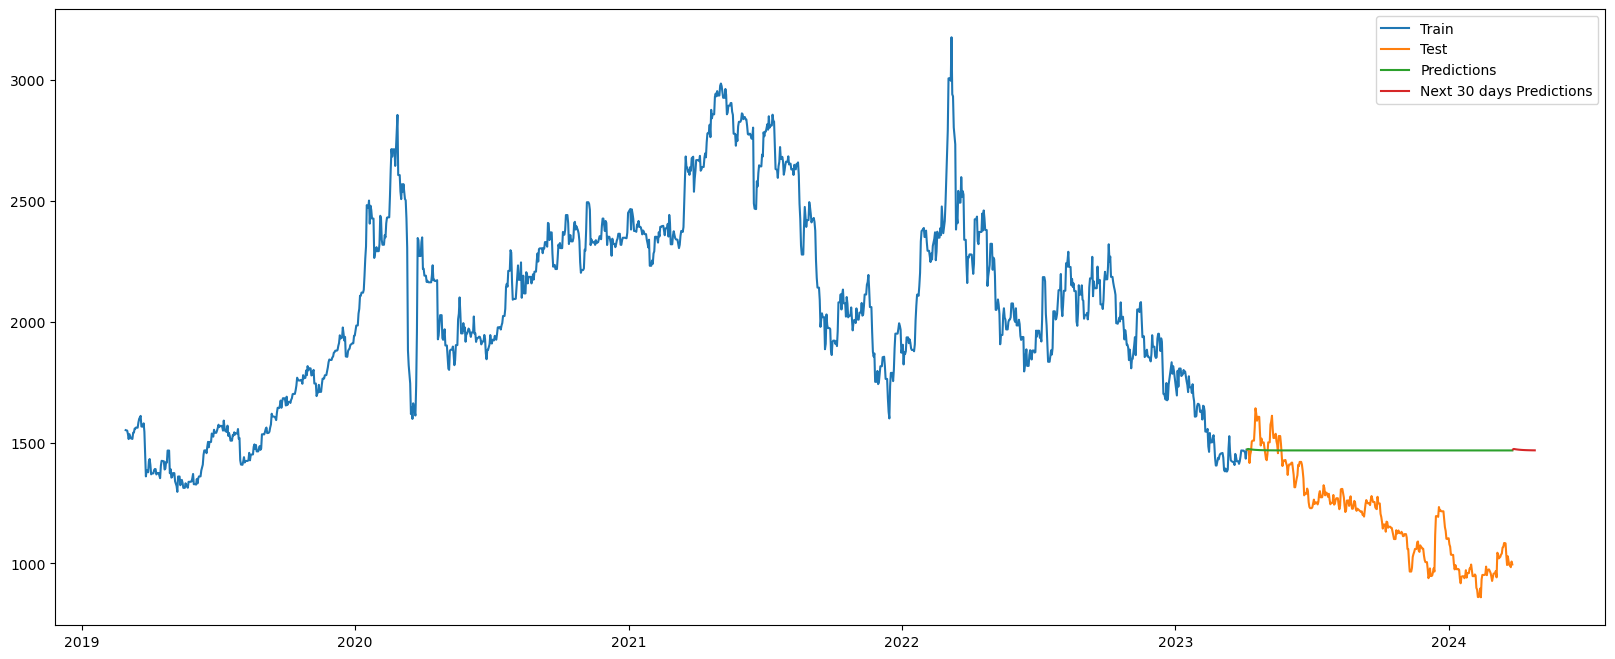

In [12]:
# Dự đoán 30 ngày
predict_days = 30

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 30 days Predictions'])
plt.show()

Giá Close dự đoán:
[1471.6699613  1473.59094231 1473.01064605 1472.48527598 1472.00963322
 1471.57901099 1471.189148   1470.83618632 1470.51663316 1470.22732634
 1469.96540298 1469.72827118 1469.51358438 1469.31921811 1469.14324899
 1468.9839357  1468.83970172 1468.70911977 1468.59089767 1468.48386552
 1468.38696417 1468.29923473 1468.21980906 1468.14790118 1468.08279952
 1468.02385987 1467.97049897 1467.92218878 1467.87845125 1467.83885357
 1467.80300388 1467.77054743 1467.74116306 1467.71455997 1467.69047492
 1467.66866956 1467.64892813 1467.63105526 1467.61487409 1467.6002245
 1467.58696153 1467.57495392 1467.56408285 1467.55424076 1467.54533024
 1467.53726311 1467.52995956 1467.5233473  1467.5173609  1467.51194113
 1467.50703435 1467.50259201 1467.49857014 1467.49492895 1467.49163241
 1467.48864789 1467.48594586 1467.48349959 1467.48128486 1467.47927975]


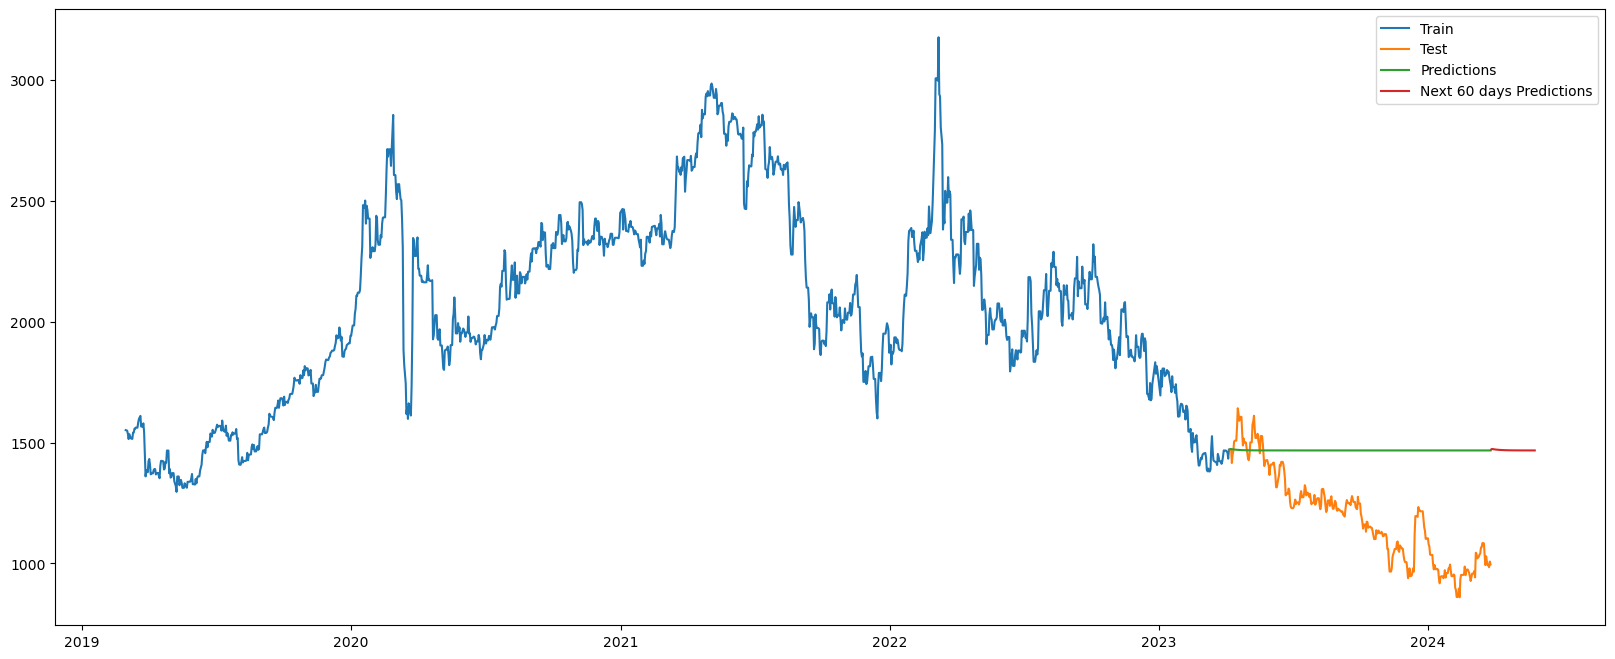

In [13]:
# Dự đoán 60 ngày
predict_days = 60

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 60 days Predictions'])
plt.show()

Giá Close dự đoán:
[1471.6699613  1473.59094231 1473.01064605 1472.48527598 1472.00963322
 1471.57901099 1471.189148   1470.83618632 1470.51663316 1470.22732634
 1469.96540298 1469.72827118 1469.51358438 1469.31921811 1469.14324899
 1468.9839357  1468.83970172 1468.70911977 1468.59089767 1468.48386552
 1468.38696417 1468.29923473 1468.21980906 1468.14790118 1468.08279952
 1468.02385987 1467.97049897 1467.92218878 1467.87845125 1467.83885357
 1467.80300388 1467.77054743 1467.74116306 1467.71455997 1467.69047492
 1467.66866956 1467.64892813 1467.63105526 1467.61487409 1467.6002245
 1467.58696153 1467.57495392 1467.56408285 1467.55424076 1467.54533024
 1467.53726311 1467.52995956 1467.5233473  1467.5173609  1467.51194113
 1467.50703435 1467.50259201 1467.49857014 1467.49492895 1467.49163241
 1467.48864789 1467.48594586 1467.48349959 1467.48128486 1467.47927975
 1467.47746444 1467.47582095 1467.47433301 1467.47298592 1467.47176633
 1467.47066217 1467.46966253 1467.4687575  1467.46793814 14

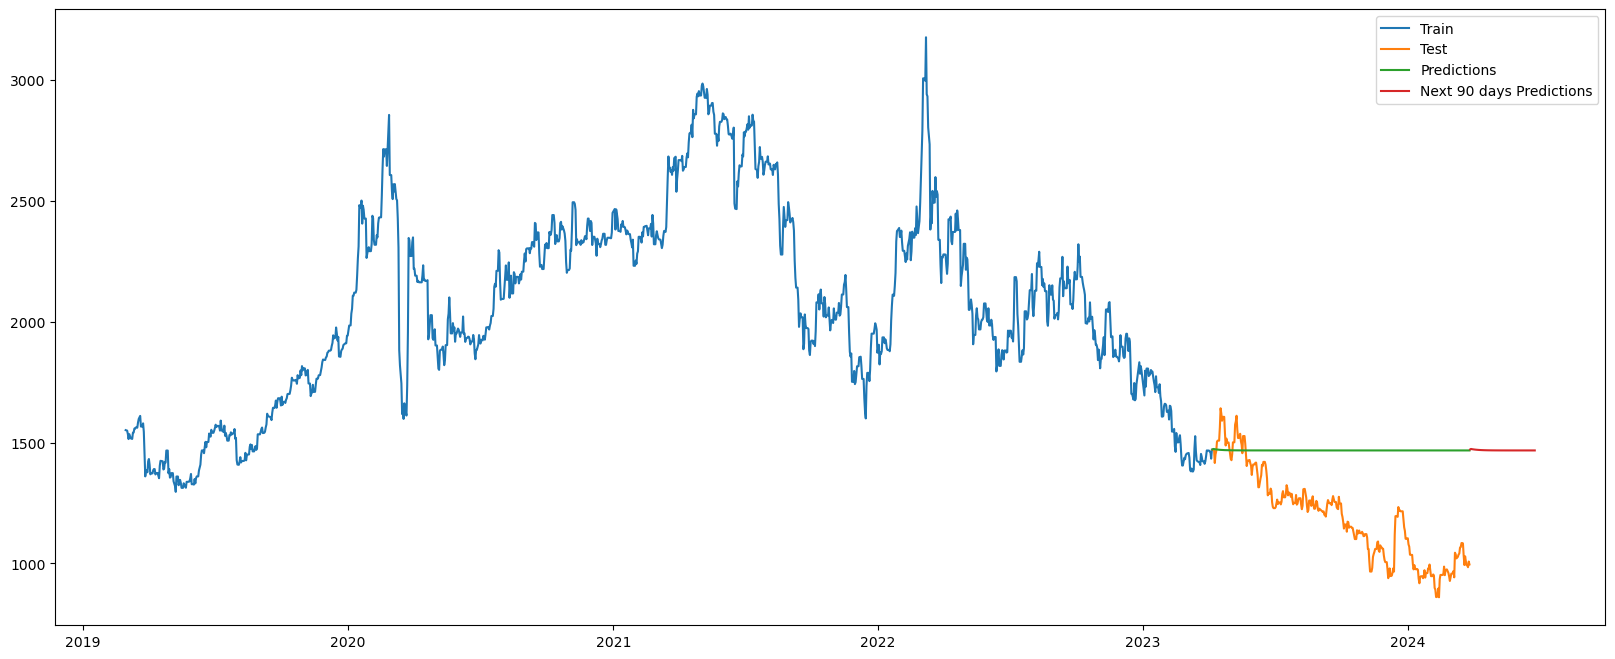

In [14]:
# Dự đoán 90 ngày
predict_days = 90

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions'])
plt.show()